https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

In [1]:
!hostname

9d9c77d5e515


In [2]:
!pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/77/63/a9fa76de8dffe7455304c4ed635be4aa9c0bacef6e0633d87d5f54530c5c/tensorflow-1.13.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/fa/7b/3ee06856ec30d5136cd2002408df1d111fcff269f3691147dbf3b8dc0ba2/tensorboard-1.13.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f4/dc/5503d89e530988eb7a1aed337dcb456ef8150f7c06132233bd9e41ec0215/grpcio-1.19.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c0/bf/0315ef6a9fd3fc2346e85b0ff1f5f83ca17073f2c31ac719ab2e4da0d4a3/Keras_Preprocessing-1.0.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/90/85/64c82949765cfb246bbdaf5aca2d55f400f792655927a017710a78445def/Keras_Applications-1.0.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/35/6b/11530768cac581a12952a2aad00e1526b89d242d0b9f59534ef6e6a1752f/astor-0.7.1-py2.py3-none-any.whl
  Using 

In [3]:
!pip install tflearn

In [4]:
!pip install scikit-plot # https://github.com/reiinakano/scikit-plot

In [5]:
!jupyter --version

4.4.0


In [6]:
!python --version

Python 3.6.7 :: Anaconda, Inc.


In [7]:
import time
import matplotlib.pyplot as plt
import pandas
print("pandas",pandas.__version__)
import numpy as np
print("numpy",np.__version__)
import sklearn.model_selection
import sklearn.tree
import sklearn.svm
import sklearn.linear_model
import sklearn.naive_bayes
import sklearn.ensemble
import sklearn.neural_network
import sklearn.metrics
import sklearn.neighbors
import scikitplot
print("scikitplot",scikitplot.__version__)
#import skflow.TensorFlowLinearClassifier
import tensorflow
print("TensorFlow",tensorflow.__version__)
import tflearn
import graphviz 

pandas 0.23.4
numpy 1.13.3
scikitplot 0.3.7
TensorFlow 1.13.1
Instructions for updating:
Colocations handled automatically by placer.


# create fake data

alternative: use a library to create fake data https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [8]:
num_rows=100

Here I assume 
* no NaNs
* no blanks
* each variable has been normalized
* categorical data has been addressed using an encoding (binary or one-hot or something else)
* classes are balanced

In [9]:
df1 = pandas.DataFrame(np.abs(np.random.randn(num_rows, 4)), columns=list('ABCD'))
#df1.head()

In [10]:
df2 = pandas.DataFrame(np.random.randint(10,size=(num_rows, 4)), columns=list('EFGH'))
#df2.head()

In [11]:
df3 = pandas.DataFrame(np.random.randint(2,size=(num_rows, 1)), columns=list('J'))
#df3.head()

In [12]:
cleaned_df = pandas.concat([df1, df2,df3], axis=1, join_axes=[df1.index])
cleaned_df.head()

,A,B,C,D,E,F,G,H,J
0,0.150312,0.979929,0.261197,1.225773,4,9,3,4,0
1,1.652808,0.707967,0.154497,0.339827,3,2,2,0,0
2,0.995342,1.342879,1.912199,0.154940,1,8,0,9,0
3,1.168305,0.357393,2.543614,0.629163,2,8,4,9,0
4,0.031150,1.628379,0.649783,1.098126,0,9,9,8,0


# split input data

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn

In [13]:
X = cleaned_df.drop('J', axis=1)
print('dimensions:',X.shape)
X.head()

dimensions: (100, 8)


,A,B,C,D,E,F,G,H
0,0.150312,0.979929,0.261197,1.225773,4,9,3,4
1,1.652808,0.707967,0.154497,0.339827,3,2,2,0
2,0.995342,1.342879,1.912199,0.154940,1,8,0,9
3,1.168305,0.357393,2.543614,0.629163,2,8,4,9
4,0.031150,1.628379,0.649783,1.098126,0,9,9,8


In [14]:
y=cleaned_df['J']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: J, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
print('dimensions:',X_train.shape)
X_train.head()

dimensions: (67, 8)


,A,B,C,D,E,F,G,H
28,1.161808,0.008167,0.868759,0.678722,0,8,5,7
93,2.037937,1.300392,0.715537,0.726021,2,7,3,2
5,1.081579,2.194685,1.204773,0.667964,2,3,5,9
66,0.346470,0.389204,0.619180,2.004350,4,4,1,7
65,0.315368,0.058484,1.210778,1.495647,2,9,4,5


In [17]:
print('dimensions:',X_test.shape)
X_test.head()

dimensions: (33, 8)


,A,B,C,D,E,F,G,H
83,1.476630,0.057975,1.212460,0.778498,2,5,2,5
53,0.519646,0.925870,2.959715,0.525239,0,2,9,2
70,0.434600,0.069429,0.389808,0.958419,5,0,7,7
45,1.164568,0.524950,0.781820,0.129168,1,1,3,9
44,0.579018,0.078114,1.231113,0.727344,8,3,5,2


In [18]:
print(y_train.value_counts())

y_train.head()

0    34
1    33
Name: J, dtype: int64


28    0
93    0
5     1
66    0
65    1
Name: J, dtype: int64

In [19]:
print(y_test.value_counts())

y_test.head()

1    17
0    16
Name: J, dtype: int64


83    0
53    1
70    1
45    0
44    0
Name: J, dtype: int64

# Support Vector Machine

https://scikit-learn.org/stable/modules/svm.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [20]:
svm_clf = sklearn.svm.SVC(gamma='auto',probability=True)
output = svm_clf.fit(X_train, y_train) 
output

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
y_pred = svm_clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [22]:
y_test.head()

83    0
53    1
70    1
45    0
44    0
Name: J, dtype: int64

https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score
    
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [23]:
score = sklearn.metrics.accuracy_score(y_test,y_pred)
print("Accuracy: %f" % score)

Accuracy: 0.606061


https://en.wikipedia.org/wiki/Receiver_operating_characteristic

Rather than navigate this code, https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html and https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

I'm going to use <a href="https://github.com/reiinakano/scikit-plot">scikit-plot</a> to visualize the ROC 

In [24]:
# Get y_probabilities
y_probas = svm_clf.predict_proba(X_train)
y_probas[0:10]

array([[ 0.45479672,  0.54520328],
       [ 0.46934821,  0.53065179],
       [ 0.5353665 ,  0.4646335 ],
       [ 0.47833209,  0.52166791],
       [ 0.54201031,  0.45798969],
       [ 0.51291581,  0.48708419],
       [ 0.56588528,  0.43411472],
       [ 0.51115074,  0.48884926],
       [ 0.46438345,  0.53561655],
       [ 0.55258817,  0.44741183]])

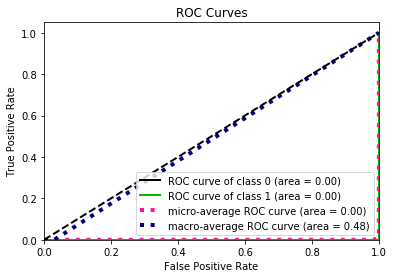

In [25]:
# https://github.com/reiinakano/scikit-plot/blob/master/examples/jupyter_notebooks/plot_roc_curve.ipynb
scikitplot.metrics.plot_roc(y_train, y_probas, cmap='nipy_spectral')
plt.show()

In [26]:
#https://github.com/reiinakano/scikit-plot/blob/master/examples/jupyter_notebooks/plot_confusion_matrix.ipynb
predictions = sklearn.model_selection.cross_val_predict(svm_clf, X_train, y_train,cv=3)
predictions

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

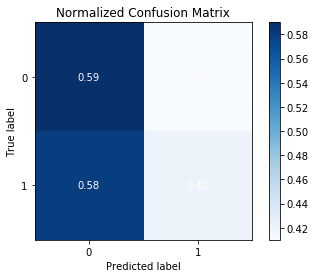

In [27]:
plot = scikitplot.metrics.plot_confusion_matrix(y_train, predictions, normalize=True)

# Logistic regression

In [28]:
lr_clf = sklearn.linear_model.LogisticRegression()
lr_clf.fit(X_test, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
y_pred = lr_clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [30]:
y_test

83    0
53    1
70    1
45    0
44    0
39    1
22    1
80    1
10    0
0     0
18    1
30    1
73    0
33    0
90    1
4     0
76    1
77    0
12    1
31    1
55    0
88    0
26    0
42    0
69    1
15    1
40    1
96    1
9     0
72    1
11    0
47    0
85    1
Name: J, dtype: int64

In [31]:
print('score:', sklearn.metrics.accuracy_score(y_test,y_pred) )

score: 0.757575757576


# K nearest neighbors

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [32]:
neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [33]:
y_pred = neigh.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [34]:
y_test

83    0
53    1
70    1
45    0
44    0
39    1
22    1
80    1
10    0
0     0
18    1
30    1
73    0
33    0
90    1
4     0
76    1
77    0
12    1
31    1
55    0
88    0
26    0
42    0
69    1
15    1
40    1
96    1
9     0
72    1
11    0
47    0
85    1
Name: J, dtype: int64

# naive bayes

https://scikit-learn.org/stable/modules/naive_bayes.html

In [35]:
gnb = sklearn.naive_bayes.GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [36]:
y_test

83    0
53    1
70    1
45    0
44    0
39    1
22    1
80    1
10    0
0     0
18    1
30    1
73    0
33    0
90    1
4     0
76    1
77    0
12    1
31    1
55    0
88    0
26    0
42    0
69    1
15    1
40    1
96    1
9     0
72    1
11    0
47    0
85    1
Name: J, dtype: int64

In [37]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
score = sklearn.metrics.accuracy_score(y_test,y_pred)
print("Accuracy: %f" % score)

Accuracy: 0.545455


# Decision tree

https://scikit-learn.org/stable/modules/tree.html

In [38]:
dt_clf = sklearn.tree.DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)

In [39]:
dt_clf.predict(X_test) # what should y_test be based on the X_test input?

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [40]:
y_test # and what the actual values are for y_test

83    0
53    1
70    1
45    0
44    0
39    1
22    1
80    1
10    0
0     0
18    1
30    1
73    0
33    0
90    1
4     0
76    1
77    0
12    1
31    1
55    0
88    0
26    0
42    0
69    1
15    1
40    1
96    1
9     0
72    1
11    0
47    0
85    1
Name: J, dtype: int64

In [41]:
dot_data = sklearn.tree.export_graphviz(dt_clf, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("iris") # PDF

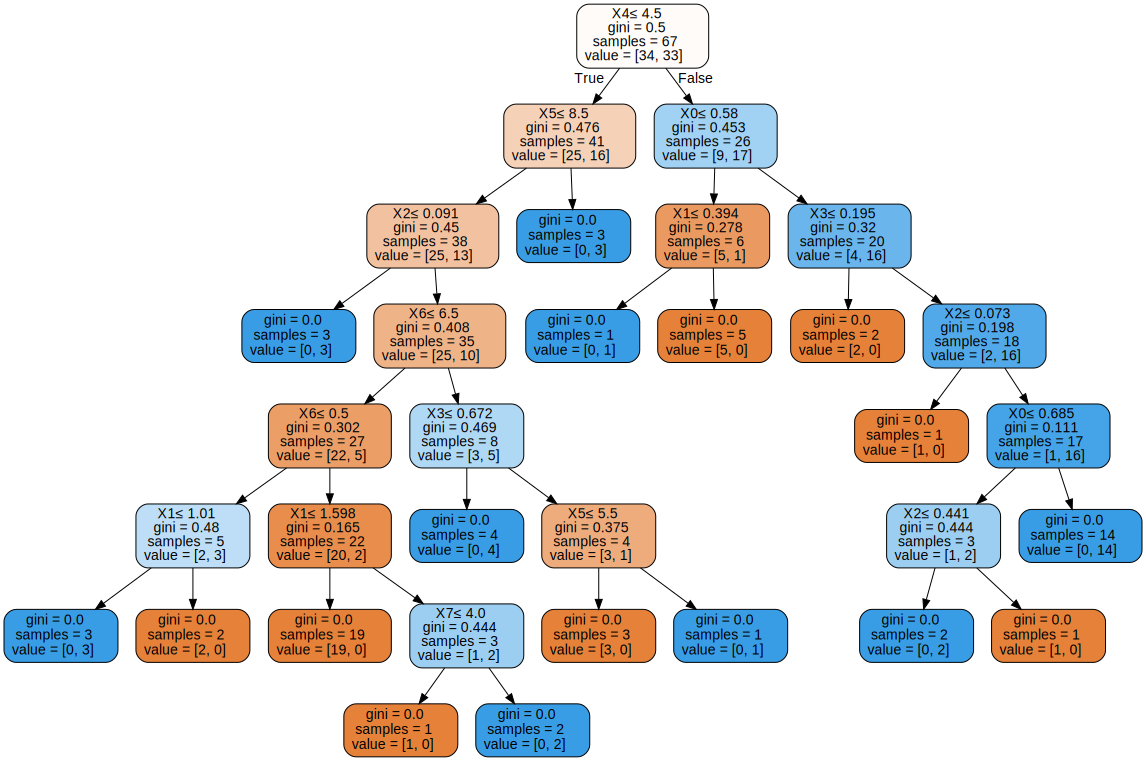

In [42]:
dot_data = sklearn.tree.export_graphviz(dt_clf, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [43]:
rf_clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rf_output = rf_clf.fit(X_train, y_train)
rf_output

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [44]:
rf_clf.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [45]:
y_test

83    0
53    1
70    1
45    0
44    0
39    1
22    1
80    1
10    0
0     0
18    1
30    1
73    0
33    0
90    1
4     0
76    1
77    0
12    1
31    1
55    0
88    0
26    0
42    0
69    1
15    1
40    1
96    1
9     0
72    1
11    0
47    0
85    1
Name: J, dtype: int64

In [46]:
rf_clf.score(X_test,y_test)

0.48484848484848486

In [47]:
list_of_importances = list(zip(X.columns,rf_clf.feature_importances_))

In [48]:
output = sorted(list_of_importances, key=lambda x: x[-1],reverse=True)
output

[('C', 0.19491308203656751),
 ('B', 0.15545946288381607),
 ('A', 0.15054940675300246),
 ('D', 0.13197405616651353),
 ('G', 0.11841506251393442),
 ('E', 0.1160094084634098),
 ('H', 0.079525204668484048),
 ('F', 0.053154316514272174)]

Feature ranking:
1. feature 2 (0.194913)
2. feature 1 (0.155459)
3. feature 0 (0.150549)
4. feature 3 (0.131974)
5. feature 6 (0.118415)
6. feature 4 (0.116009)
7. feature 7 (0.079525)
8. feature 5 (0.053154)


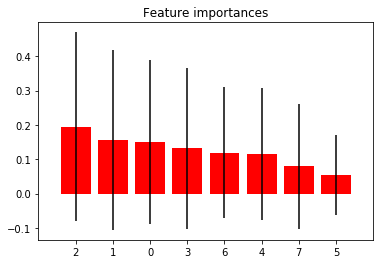

In [49]:
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [50]:
# Get y_probabilities
y_probas = rf_clf.predict_proba(X_train)
y_probas[0:10]

array([[ 0.60836754,  0.39163246],
       [ 0.60438511,  0.39561489],
       [ 0.44767078,  0.55232922],
       [ 0.63739976,  0.36260024],
       [ 0.578528  ,  0.421472  ],
       [ 0.49745952,  0.50254048],
       [ 0.49062444,  0.50937556],
       [ 0.42267775,  0.57732225],
       [ 0.66309466,  0.33690534],
       [ 0.44251024,  0.55748976]])

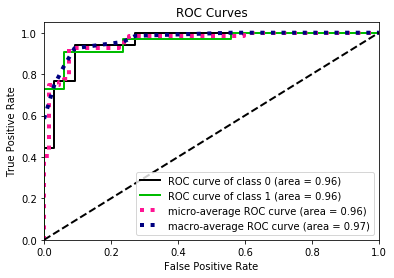

In [51]:
# https://github.com/reiinakano/scikit-plot/blob/master/examples/jupyter_notebooks/plot_roc_curve.ipynb
scikitplot.metrics.plot_roc(y_train, y_probas, cmap='nipy_spectral')
plt.show()

# sklearn neural network

https://scikit-neuralnetwork.readthedocs.io/en/latest/

https://www.kdnuggets.com/2016/10/beginners-guide-neural-networks-python-scikit-learn.html

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [52]:
param={'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,'learning_rate_init': 0.2}
mlp = sklearn.neural_network.MLPClassifier(verbose=0, 
                                           random_state=0,
                                           max_iter=1000)

In [53]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [54]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Training set loss: %f" % mlp.loss_)

Training set score: 1.000000
Training set loss: 0.029660


In [55]:
mlp.predict(X_test)

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [56]:
y_test

83    0
53    1
70    1
45    0
44    0
39    1
22    1
80    1
10    0
0     0
18    1
30    1
73    0
33    0
90    1
4     0
76    1
77    0
12    1
31    1
55    0
88    0
26    0
42    0
69    1
15    1
40    1
96    1
9     0
72    1
11    0
47    0
85    1
Name: J, dtype: int64

In [57]:
mlp.score(X_test, y_test)

0.51515151515151514

# tensorflow neural network using a pre-made Estimator

sklearn --> tflearn --> estimators

old: sklearn; https://www.kdnuggets.com/2016/02/scikit-flow-easy-deep-learning-tensorflow-scikit-learn.html

* https://www.tensorflow.org/guide/premade_estimators
* https://www.tensorflow.org/tutorials/estimators/linear
* https://www.tensorflow.org/guide/estimators


In [58]:
# https://medium.com/when-i-work-data/converting-a-pandas-dataframe-into-a-tensorflow-dataset-752f3783c168

training_df: pandas.DataFrame = pandas.DataFrame(
    data={
        'feature1': np.random.rand(10),
        'feature2': np.random.rand(10),
        'feature3': np.random.rand(10),
        'target': np.random.randint(0, 3, 10)
    }
)
features = ['feature1', 'feature2', 'feature3']
training_df

,feature1,feature2,feature3,target
0,0.111148,0.199281,0.873231,1
1,0.401913,0.811834,0.437039,1
2,0.407708,0.401179,0.228143,2
3,0.239890,0.513941,0.362460,2
4,0.463045,0.930482,0.606501,0
5,0.337516,0.937267,0.131944,1
6,0.587586,0.307606,0.284352,2
7,0.586817,0.624684,0.535407,0
8,0.677368,0.850526,0.202244,2
9,0.851744,0.116354,0.658900,1


In [59]:
training_df[features].values  # X_train

array([[ 0.11114837,  0.19928116,  0.8732315 ],
       [ 0.40191335,  0.81183369,  0.4370386 ],
       [ 0.40770818,  0.40117886,  0.22814319],
       [ 0.2398903 ,  0.51394129,  0.36246037],
       [ 0.46304452,  0.93048236,  0.60650063],
       [ 0.33751594,  0.93726721,  0.13194419],
       [ 0.58758635,  0.30760646,  0.28435244],
       [ 0.58681704,  0.62468433,  0.53540727],
       [ 0.67736791,  0.8505264 ,  0.2022444 ],
       [ 0.85174414,  0.11635433,  0.65890015]])

In [60]:
training_df['target'].values  # y_train

array([1, 1, 2, 2, 0, 1, 2, 0, 2, 1])

In [61]:
training_dataset = (
    tensorflow.data.Dataset.from_tensor_slices(
        (
            tensorflow.cast(training_df[features].values, tensorflow.float32),
            tensorflow.cast(training_df['target'].values, tensorflow.int32)
        )
    )
)

In [62]:
training_dataset

<DatasetV1Adapter shapes: ((3,), ()), types: (tf.float32, tf.int32)>

In [63]:
def input_fn(dataset):
   ''' manipulate dataset, extracting the feature dict and the label'''
   return feature_dict, label

In [64]:
population = tensorflow.feature_column.numeric_column('population')
age = tensorflow.feature_column.numeric_column('age')

In [65]:
# Instantiate an estimator, passing the feature columns.
estimator = tensorflow.estimator.LinearClassifier(feature_columns=[population, age])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp9d3vauhn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbfb7728e48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
